In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import * 
from sklearn.model_selection import *
from sklearn.linear_model import *

In [3]:
d= pd.read_csv('credit_score.csv', skipinitialspace = True)
d.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
d.duplicated().sum()

0

In [5]:
d.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
d.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
d.drop(columns=['ID', 'Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'], inplace = True)
d.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [10]:
d.tail(20)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99980,May,49,Writer,37188.1,3097.008333,1,4,5,3,7,...,3.0,_,620.64,27.495263,No,84.205949,78.49772657092517,!@9#%8,396.997157,Standard
99981,June,50,Writer,37188.1_,3097.008333,1,4,5,3,5,...,3.0,Good,620.64,37.753013,NM,84.205949,147.33990786653956,Low_spent_Small_value_payments,368.154976,Good
99982,July,50,Writer,37188.1,3097.008333,1,4,5,3,7,...,3.0,Good,620.64,38.850680,No,84.205949,82.82557214415213,!@9#%8,412.669312,Good
99983,August,50,Writer,37188.1,3097.008333,1,4,5,3,7,...,3.0,_,620.64,39.300980,No,84.205949,42.935565846112745,High_spent_Medium_value_payments,432.559318,Good
99984,January,28,Architect,20002.88,1929.906667,10,8,29,5_,35,...,9.0,Bad,3571.7_,22.895966,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor
99985,February,28,Architect,20002.88,1929.906667,10,8,29,5,33,...,9.0,Bad,3571.7_,39.772607,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
99986,March,28,Architect,20002.88,1929.906667,10,8,29,5,33,...,9.0,Bad,3571.7,24.713861,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
99987,April,28_,Architect,20002.88,1929.906667,10,8,29,-100,33,...,9.0,_,3571.7,30.614953,Yes,60.964772,43.72461709437765,High_spent_Large_value_payments,328.301277,Standard
99988,May,28,Architect,20002.88,1929.906667,10,8,29,5,33,...,9.0,_,3571.7,28.508250,Yes,60.964772,213.97800979403817,Low_spent_Small_value_payments,208.047884,Standard
99989,June,28,_______,20002.88,1929.906667,10,8,29,5,33,...,9.0,Bad,3571.7,33.359987,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,Standard


In [15]:
d.shape

(100000, 22)

In [17]:
d.size

2200000

In [19]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [21]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [23]:
d['Age'] = d['Age'].astype(str).str.replace('_', '')
d['Age'] = d['Age'].astype(int)

# Occupation: Replace underscores and empty string with NaN
d['Occupation'] = d['Occupation'].str.replace('_______', '')
d['Occupation'].replace('', np.nan, inplace=True)

# Annual_Income: Clean underscores and convert to float
d['Annual_Income'] = d['Annual_Income'].astype(str).str.replace('_', '')
d['Annual_Income'] = d['Annual_Income'].astype(float)

# Num_of_Loan: Clean underscores and convert to int
d['Num_of_Loan'] = d['Num_of_Loan'].astype(str).str.replace('_', '')
d['Num_of_Loan'] = d['Num_of_Loan'].astype(int)

# Num_of_Delayed_Payment: Replace 'nan' strings, fill with 0, and convert to int
d['Num_of_Delayed_Payment'] = d['Num_of_Delayed_Payment'].replace('nan', np.nan).fillna(0)
d['Num_of_Delayed_Payment'] = d['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')
d['Num_of_Delayed_Payment'] = d['Num_of_Delayed_Payment'].astype(int)

# Changed_Credit_Limit: Clean and convert to float
d['Changed_Credit_Limit'] = d['Changed_Credit_Limit'].astype(str).str.replace('_', '')
d['Changed_Credit_Limit'] = d['Changed_Credit_Limit'].replace('', np.nan)
d['Changed_Credit_Limit'] = d['Changed_Credit_Limit'].astype(float)

# Credit_Mix: Replace values with map
d['Credit_Mix'] = d['Credit_Mix'].replace('_', '')
d['Credit_Mix'] = d['Credit_Mix'].replace(['Bad','Standard','Good'],[0,1,2])

# Outstanding_Debt: Clean underscores and convert to float
d['Outstanding_Debt'] = d['Outstanding_Debt'].astype(str).str.replace('_', '')
d['Outstanding_Debt'] = d['Outstanding_Debt'].astype(float)

# Payment_of_Min_Amount: Map 'NM' to 'No' and 'No' to 0, 'Yes' to 1
d['Payment_of_Min_Amount'] = d['Payment_of_Min_Amount'].replace('NM', 'No')
d['Payment_of_Min_Amount'] = d['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])


# Amount_invested_monthly: Clean underscores and convert to float
d['Amount_invested_monthly'] = d['Amount_invested_monthly'].astype(str).str.replace('_', '')
d['Amount_invested_monthly'] = d['Amount_invested_monthly'].astype(float)

# Monthly_Balance: Clean underscores and convert to float
d['Monthly_Balance'] = d['Monthly_Balance'].astype(str).str.replace('_', '')
d['Monthly_Balance'] = d['Monthly_Balance'].astype(float)

# Credit_Score: Map values to 0, 1, 2
d['Credit_Score'] = d['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])



In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int32  
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [27]:
d.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [29]:
d.dropna(inplace = True)

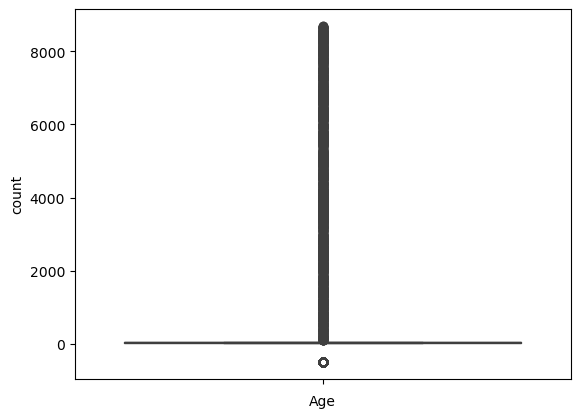

In [31]:
sns.boxplot(d['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

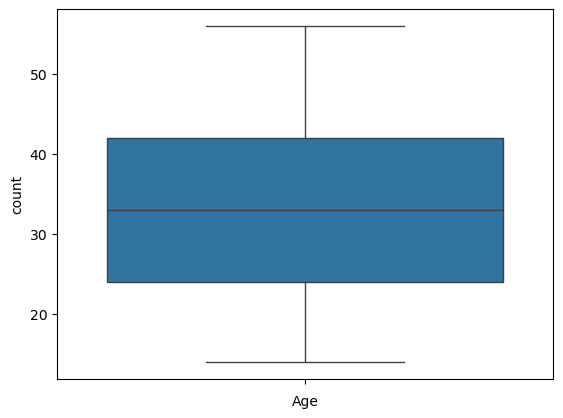

In [33]:
q1 = d.Age.quantile(0.25)
q3 = d.Age.quantile(0.75)
iqr = q3 - q1
data = d[(d.Age >= q1 - 1.5*iqr) & (d.Age <= q3 + 1.5*iqr)]
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [35]:
le = LabelEncoder()
d['Month']=le.fit_transform(d['Month'])
d['Occupation']=le.fit_transform(d['Occupation'])
d['Payment_Behaviour']=le.fit_transform(d['Payment_Behaviour'])
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71601 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     71601 non-null  int32  
 1   Age                       71601 non-null  int32  
 2   Occupation                71601 non-null  int32  
 3   Annual_Income             71601 non-null  float64
 4   Monthly_Inhand_Salary     71601 non-null  float64
 5   Num_Bank_Accounts         71601 non-null  int64  
 6   Num_Credit_Card           71601 non-null  int64  
 7   Interest_Rate             71601 non-null  int64  
 8   Num_of_Loan               71601 non-null  int32  
 9   Delay_from_due_date       71601 non-null  int64  
 10  Num_of_Delayed_Payment    71601 non-null  int32  
 11  Changed_Credit_Limit      71601 non-null  float64
 12  Num_Credit_Inquiries      71601 non-null  float64
 13  Credit_Mix                71601 non-null  object 
 14  Outstanding

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for i in d.columns:
    if ((d[i].dtype != 'object') & (i != 'Credit_Score')):
        col_list.append(i)
x = d[col_list]
vf = pd.DataFrame()
vf['feature'] = x.columns
vf['vif'] = [variance_inflation_factor(x.values, i) for i in range(len (x.columns))]
print(vf)

                     feature       vif
0                      Month  0.299668
1                        Age  0.974541
2                 Occupation  0.277606
3              Annual_Income  0.985030
4      Monthly_Inhand_Salary  0.367833
5          Num_Bank_Accounts  0.979413
6            Num_Credit_Card  0.970454
7              Interest_Rate  0.976107
8                Num_of_Loan  0.997603
9        Delay_from_due_date  0.331398
10    Num_of_Delayed_Payment  0.982812
11      Changed_Credit_Limit  0.298485
12      Num_Credit_Inquiries  0.979745
13          Outstanding_Debt  0.395382
14  Credit_Utilization_Ratio  0.024322
15     Payment_of_Min_Amount  0.475387
16       Total_EMI_per_month  0.972295
17   Amount_invested_monthly  0.913597
18         Payment_Behaviour  0.257198
19           Monthly_Balance  1.000290


# Logistic Regression

In [40]:
x = d.drop(columns=['Credit_Score'])

In [42]:
y = d['Credit_Score']

In [44]:
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3,23,12,19114.12,1824.843333,3,4,3,4,3,...,11.27,4.0,,809.98,26.822620,0,49.574949,80.415295,3,312.494089
4,7,23,12,19114.12,1824.843333,3,4,3,4,6,...,11.27,4.0,2,809.98,24.797347,0,49.574949,41.420153,2,341.489231
6,4,23,12,19114.12,1824.843333,3,4,3,4,3,...,11.27,4.0,2,809.98,22.537593,0,49.574949,178.344067,6,244.565317
7,1,23,12,19114.12,1824.843333,3,4,3,4,3,...,11.27,4.0,2,809.98,23.933795,0,49.574949,24.785217,2,358.124168
9,2,28,13,34847.84,3037.986667,2,4,6,1,7,...,7.42,2.0,2,605.03,38.550848,0,18.816215,40.391238,1,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,25,9,39628.99,3359.415833,4,6,7,2,23,...,11.50,3.0,,502.38,34.663572,0,35.104023,60.971333,1,479.866228
99996,7,25,9,39628.99,3359.415833,4,6,7,2,18,...,11.50,3.0,,502.38,40.565631,0,35.104023,54.185950,2,496.651610
99997,5,25,9,39628.99,3359.415833,4,6,5729,2,27,...,11.50,3.0,2,502.38,41.255522,0,35.104023,24.028477,1,516.809083
99998,4,25,9,39628.99,3359.415833,4,6,7,2,20,...,11.50,3.0,2,502.38,33.638208,0,35.104023,251.672582,4,319.164979


In [46]:
y

0        2
4        2
6        2
7        1
9        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 71601, dtype: int64

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 31)

In [50]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

ValueError: could not convert string to float: ''

In [144]:
log = LogisticRegression()
log.fit(x_train,y_train)
# Step 1: Replace empty strings with NaN
x_test.replace('', np.nan, inplace=True)

# Step 2: Handle NaN values (fill with mean or other strategies)
x_test.fillna(x_test.mean(), inplace=True)

# Step 3: Ensure data is numeric
x_test = x_test.astype(float)

# Step 4: Make predictions
y_pred = log.predict(x_test)


In [150]:
a = accuracy_score(y_test,y_pred)*100
pd.DataFrame({'actual':y_test, 'predicted':y_pred})

,actual,predicted
25988,1,1
56260,1,1
44918,1,1
73041,2,1
11692,1,1
...,...,...
62391,1,0
51005,2,2
84021,2,1
31107,1,1


In [152]:
a

54.37499999999999

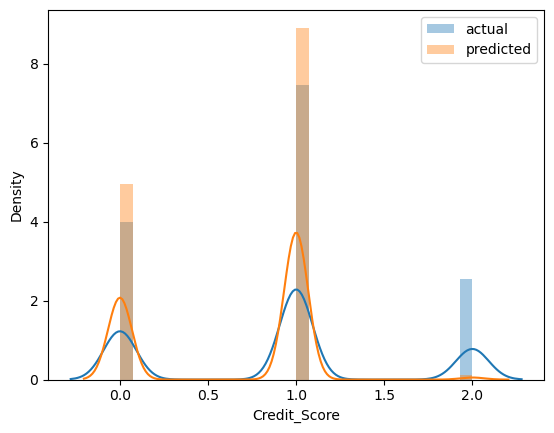

In [173]:
sns.distplot(y_test, label = 'actual')
sns.distplot(y_pred, label = 'predicted')
plt.legend()

# Decision Tree

In [157]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)

In [167]:
b = accuracy_score(y_test,y_preddt)*100
pd.DataFrame({'actual': y_test, 'predicted':y_preddt})

,actual,predicted
25988,1,1
56260,1,2
44918,1,1
73041,2,0
11692,1,1
...,...,...
62391,1,1
51005,2,1
84021,2,2
31107,1,1


In [169]:
b

52.12

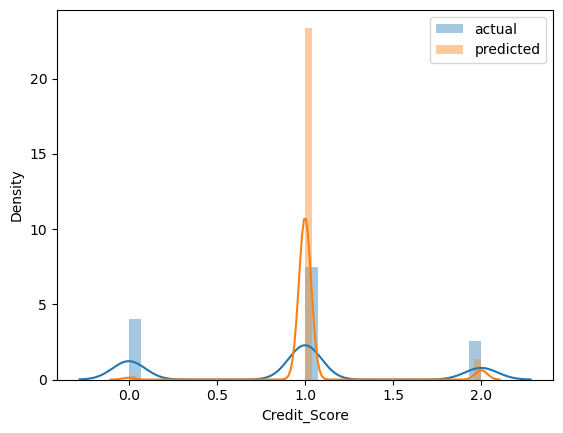

In [171]:
sns.distplot(y_test, label = 'actual')
sns.distplot(y_preddt, label = 'predicted')
plt.legend()

## Hyperparameter Tuning

In [186]:
p = {'max_features': ['log2','sqrt','auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth':[2,3,5,50,100],
    'min_samples_split': [2,3,5,50,100],
    'min_samples_leaf':[1,4,8,10]}
g = GridSearchCV(dt,p)
g = g.fit(x_train,y_train)
dt = g.best_estimator_
dt.fit(x_train,y_train)
y_predg = dt.predict(x_test)
acc = round(accuracy_score(y_test,y_predg)*100)
acc

47

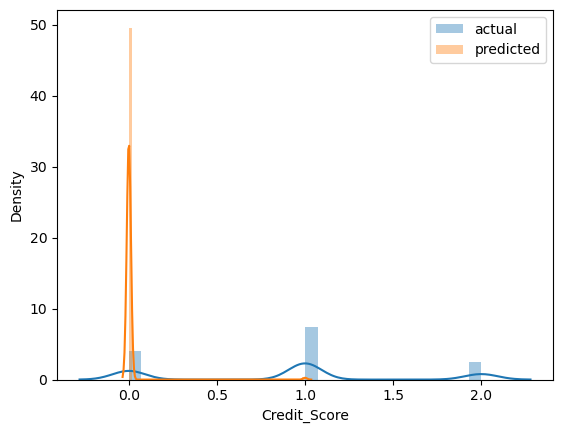

In [182]:
sns.distplot(y_test, label = 'actual')
sns.distplot(y_predg, label = 'predicted')
plt.legend()

# Random Forest

In [184]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf = rf.predict(x_test)
dacc = accuracy_score(y_test,y_predrf)*100
pd.DataFrame({'actual': y_test, 'predicted':y_predrf})

,actual,predicted
25988,1,1
56260,1,1
44918,1,1
73041,2,1
11692,1,1
...,...,...
62391,1,1
51005,2,1
84021,2,1
31107,1,1


In [185]:
dacc

53.295